In [1]:
import pandas as pd

In [2]:
green_df = pd.read_csv('./data/green_list_0412.csv')
rc_df = pd.read_csv('./data/recall_list_0412.csv')

In [3]:
green_df[:3]

,기업명,인증연도,제품명
0,대한제지,1997,폐지
1,전주페이퍼,1997,폐지
2,한일시멘트,1999,폐요업


In [9]:
rc_df[:3]

,기업명,인증연도,리콜종류,제품명
0,신지모루,2024,자발적리콜,마그네틱 보조배터리
1,휴리엔,2024,자발적리콜,가정용 음식물처리기
2,MTD Products Inc.,2024,자발적리콜,"잔디깍기(제로턴 잔디깍기, Zero Turn Lawn Mowers)"


In [5]:
company_green = list(set(green_df['기업명']))

# 각 기업명의 카운트 계산
counts = []
for token in company_green:
    count = (green_df['기업명'] == token).sum()
    counts.append(count)

# 결과를 데이터프레임으로 생성
green_df = pd.DataFrame({
    '기업명': company_green,
    '횟수': counts
})

green_df[:3]

,기업명,횟수
0,보은아스콘,1
1,벽진산업,1
2,홍원제지,1


In [10]:
recall_df = rc_df.groupby(['기업명', '리콜종류']).size().unstack(fill_value=0)
recall_df.reset_index(inplace=True)  # 인덱스 리셋

# 결과 출력
recall_df[:3]

리콜종류,기업명,권고에따른리콜,명령에따른리콜,자발적리콜
0,(유)그룹세브코리아,0,0,1
1,(유)나이키코리아,0,1,0
2,(유)더보케이블,0,2,0


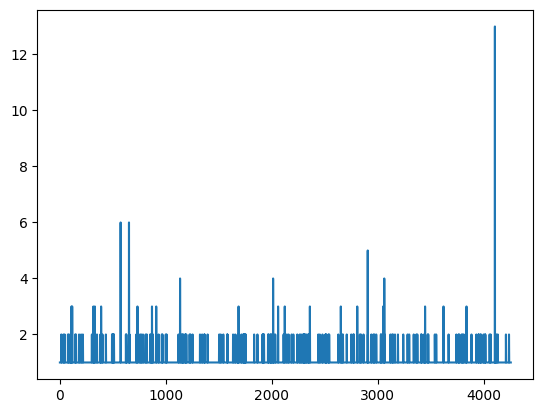

In [7]:
import matplotlib.pyplot as plt

plt.plot(green_df['횟수'].tolist())
plt.show()

In [ ]:
plt.plot(recall_df['권고에따른리콜'].tolist())
plt.show

In [ ]:
plt.plot(recall_df['명령에따른리콜'].tolist())
plt.show

In [ ]:
plt.plot(recall_df['자발적리콜'].tolist())
plt.show

In [11]:
def company_product_count(df,company=str,count=str):
    company_count = list(zip(df[company],df[count]))
    return company_count


In [13]:
# 그린제품 만든 기업 (최고 5점)
# 1~2번 만든 기업 : 2점
# 3~4번 만든 기업 : 3점
# 4~max번 만든 기업 : 5점

company_count = company_product_count(green_df,'기업명','횟수')

green_company = []
for company, count in company_count :
    green_point = 0
    if count == 0 :
        green_point = 0
    elif 1 <= count <= 2 :
        green_point = 2
    elif 3 <= count <= 4 :
        green_point = 3
    else :
        green_point = 5
    green_company.append((company,green_point))

green_company[:3]

[('보은아스콘', 2), ('벽진산업', 2), ('홍원제지', 2)]

In [ ]:
# 리콜 (최고 10점 만점기준)

In [14]:
# 권고에따른리콜 (기준 : 3)
# 0번: 3점
# 1번: 2점
# 2번: 1점
# 3번: 0.5점
# 4번~: 0점

company_count = company_product_count(recall_df, '기업명', '권고에따른리콜')

advice_company = []
for company, count in company_count :
    recall_point = 0
    if count == 0 :
        recall_point = 3
    elif count == 1 :
        recall_point = 2
    elif count == 2 :
        recall_point = 1
    elif count == 3 :
        recall_point = 0.5
    else :
        recall_point = 0
    advice_company.append((company,recall_point))

advice_company[:3]

[('(유)그룹세브코리아', 3), ('(유)나이키코리아', 3), ('(유)더보케이블', 3)]

In [16]:
# 명령에따른리콜 (기준 : 2)
# 0번: 2점
# 1~5번: 1.5점
# 6~10번: 1점
# 11~15번: 0.5점
# 15~~: 0점

company_count = company_product_count(recall_df, '기업명', '명령에따른리콜')

instructions_company = []
for company, count in company_count :
    recall_point = 0
    if count == 0 :
        recall_point = 2
    elif 1 <= count <= 5  :
        recall_point = 1.5
    elif 6 <= count <= 10 :
        recall_point = 1
    elif 11 <= count <= 15:
        recall_point = 0.5
    else :
        recall_point = 0
    instructions_company.append((company,recall_point))

instructions_company[:3]

[('(유)그룹세브코리아', 2), ('(유)나이키코리아', 1.5), ('(유)더보케이블', 1.5)]

In [17]:
# 자발적리콜 (기준 : 5)
# 0번: 5점
# 1번: 4점
# 2번: 3점
# 3번: 2점 
# 4번: 1점
# 5번~ : 0점

company_count = company_product_count(recall_df, '기업명', '자발적리콜')

voluntary_company = []
for company, count in company_count :
    recall_point = 0
    if count == 0 :
        recall_point = 5
    elif count == 1 :
        recall_point = 4
    elif count == 2 :
        recall_point = 3
    elif count == 3:
        recall_point = 2
    elif count == 4:
        recall_point = 1
    else :
        recall_point = 0
    voluntary_company.append((company,recall_point))

voluntary_company[:3]

[('(유)그룹세브코리아', 4), ('(유)나이키코리아', 5), ('(유)더보케이블', 5)]

In [18]:
total_product = advice_company + green_company + voluntary_company + instructions_company
total_product[:3]

[('(유)그룹세브코리아', 3), ('(유)나이키코리아', 3), ('(유)더보케이블', 3)]

In [19]:
from collections import defaultdict

company_scores = defaultdict(int)
for company, score in total_product:
    company_scores[company] += score

company_total_score = list(company_scores.items())

In [21]:
company_total_score[:10]

[('(유)그룹세브코리아', 9),
 ('(유)나이키코리아', 9.5),
 ('(유)더보케이블', 9.5),
 ('(유)우전케이블', 9.5),
 ('(유)플러스', 9.5),
 ('(유)한국휴렛팩커드', 9),
 ('(유)한일온열기', 9.5),
 ('(제품)두드림M&B (인증)한강제이케이시', 9.5),
 ('3M', 9),
 ('3M, LG전자', 9)]

In [ ]:
import csv

with open('company_scores.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['회사명', '제품점수'])
    writer.writerows(company_total_score)